In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
std_df=pd.read_csv("StudentsPerformance.csv")
std_df.head()

,Study_Hours,Attendance_%,Past_Grades,Final_Exam_Score
0,5.99,83.58,41.08,65.16
1,4.72,85.61,56.01,56.77
2,6.30,90.83,65.08,76.30
3,8.05,90.54,65.70,85.84
4,4.53,66.22,58.25,57.54


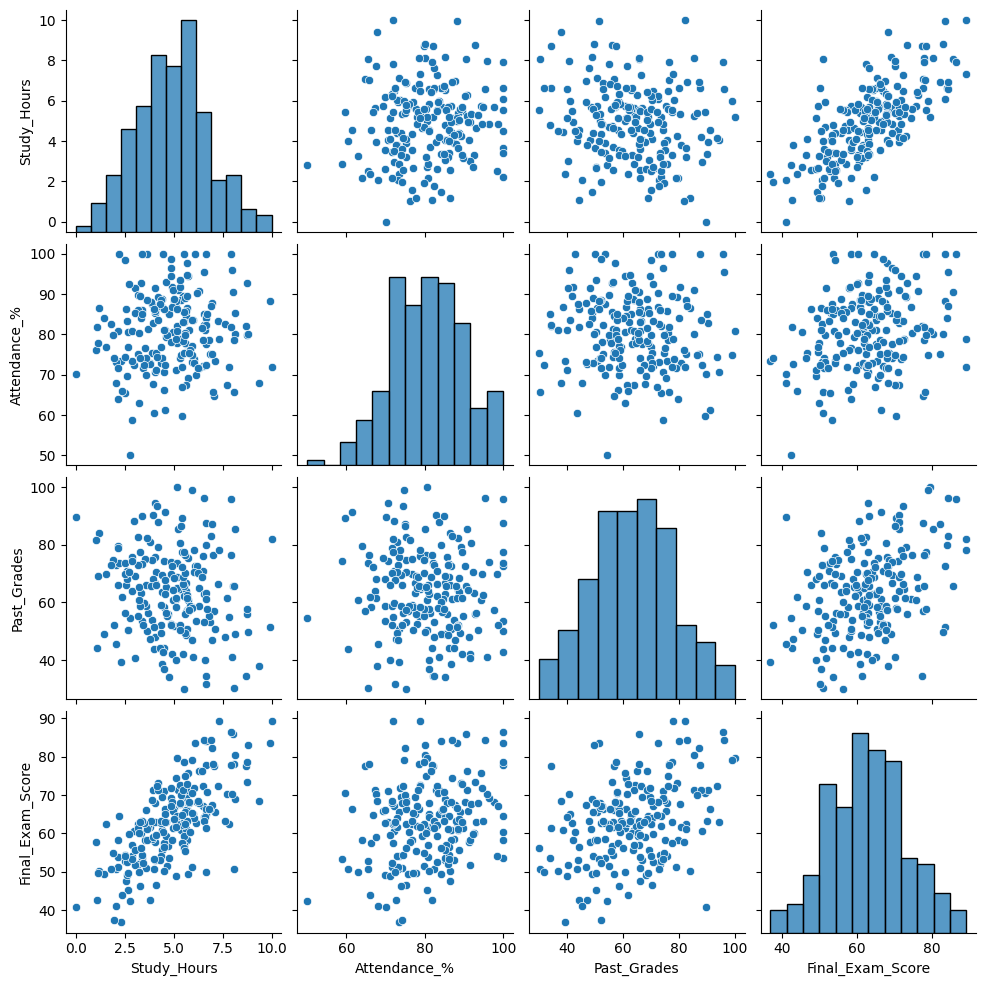

In [3]:
sns.pairplot(std_df)
plt.show()

In [4]:
corr_vals=std_df.corr()
corr_vals

,Study_Hours,Attendance_%,Past_Grades,Final_Exam_Score
Study_Hours,1.000000,0.091136,-0.137132,0.710141
Attendance_%,0.091136,1.000000,-0.045309,0.259755
Past_Grades,-0.137132,-0.045309,1.000000,0.365642
Final_Exam_Score,0.710141,0.259755,0.365642,1.000000


In [5]:
std_df.drop("Attendance_%",axis=1,inplace=True)

In [6]:
std_df.head()

,Study_Hours,Past_Grades,Final_Exam_Score
0,5.99,41.08,65.16
1,4.72,56.01,56.77
2,6.30,65.08,76.30
3,8.05,65.70,85.84
4,4.53,58.25,57.54


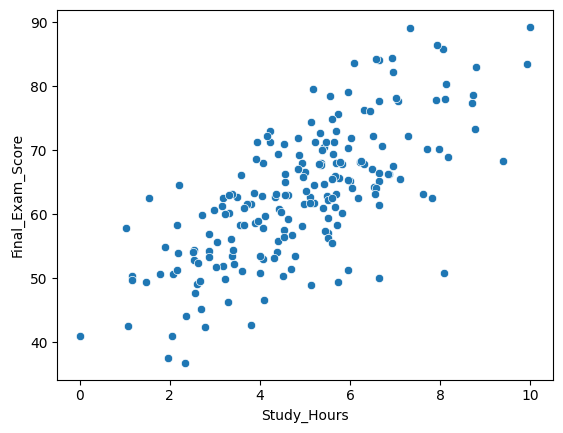

In [8]:
sns.scatterplot(x=std_df["Study_Hours"],y=std_df["Final_Exam_Score"])
plt.show()

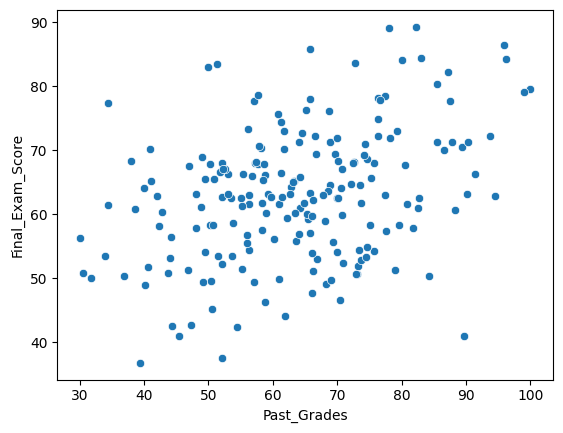

In [9]:
sns.scatterplot(x=std_df["Past_Grades"],y=std_df["Final_Exam_Score"])
plt.show()

In [11]:
# get rid of outliers for past grades
first_quartile=std_df["Past_Grades"].quantile(0.25)
median=std_df["Past_Grades"].median()
third_quartile=std_df["Past_Grades"].quantile(0.75)

In [12]:
IQR=third_quartile-first_quartile
print(f"Inter quartile range: {IQR}")

Inter quartile range: 20.48750000000001


In [13]:
lower_fence=first_quartile-1.5*(IQR)
higher_fence=third_quartile+1.5*(IQR)

In [14]:
print(lower_fence)
print(higher_fence)

22.363749999999982
104.31375000000003


In [17]:
std_df[std_df["Past_Grades"]>higher_fence]

,Study_Hours,Past_Grades,Final_Exam_Score


In [18]:
std_df.head()

,Study_Hours,Past_Grades,Final_Exam_Score
0,5.99,41.08,65.16
1,4.72,56.01,56.77
2,6.30,65.08,76.30
3,8.05,65.70,85.84
4,4.53,58.25,57.54


In [20]:
## Independent and Dependent features
X=std_df.iloc[:,:-1]
Y=std_df.iloc[:,-1]

In [21]:
# Train Test split
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [24]:
X_train.shape

(150, 2)

In [25]:
X_test.shape

(50, 2)

In [26]:
# Standardization of independent features
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [27]:
X_train=scale.fit_transform(X_train)

In [28]:
X_test=scale.transform(X_test)

In [29]:
# Model Training
from sklearn.linear_model import LinearRegression

reg_model=LinearRegression(n_jobs=-1)

In [31]:
reg_model.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [32]:
# let's see performance metrics 
from sklearn.metrics import r2_score
r_sq=r2_score(y_true=y_test,y_pred=reg_model.predict(X_test))
print(r_sq)

0.6685038480381724


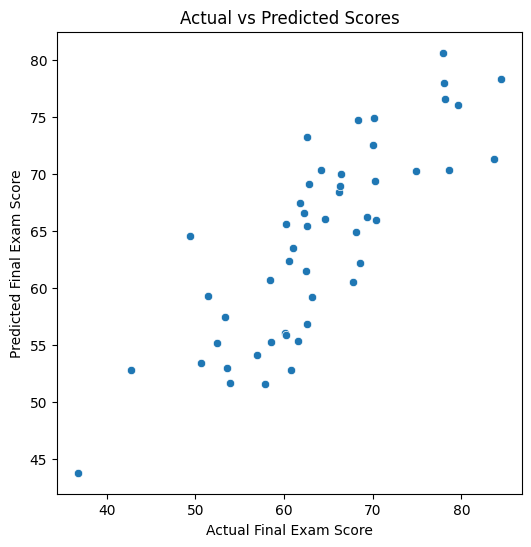

In [43]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=reg_model.predict(X_test))
plt.xlabel("Actual Final Exam Score")
plt.ylabel("Predicted Final Exam Score")
plt.title("Actual vs Predicted Scores")
plt.show()